<a href="https://colab.research.google.com/github/MhammadRezaValiYari/GoldTransectionTimeSeriesAnalysis/blob/main/GoldTransectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**

## Import Essesional Library

In [38]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.7 MB/s eta 0:00:00


In [43]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
data = yf.download('GC=F', start='2024-1-13', end='2025-1-13')
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head(2)

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2024-01-16,2026.000000,2054.800049,2026.000000,2051.699951,46
2024-01-17,2002.599976,2026.500000,2002.599976,2026.500000,764


## Data Cleaning

In [4]:
def clean_columns(data):
  if 'Date' in data.columns:
      data = data.set_index('Date')
  data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
  data.columns = [col.replace('GC=F', ' ') for col in data.columns]
  if data.index.name == "Date":
      data = data.reset_index()

In [5]:
clean_columns(data)

In [6]:
data.head(2)

,Close,High,Low,Open,Volume
Date,,,,,
2024-01-16,2026.000000,2054.800049,2026.000000,2051.699951,46
2024-01-17,2002.599976,2026.500000,2002.599976,2026.500000,764


In [7]:
data = data.reset_index()

In [8]:
data.head(2)

,Date,Close,High,Low,Open,Volume
0,2024-01-16,2026.000000,2054.800049,2026.000000,2051.699951,46
1,2024-01-17,2002.599976,2026.500000,2002.599976,2026.500000,764


In [9]:
data.columns

Index(['Date', 'Close  ', 'High  ', 'Low  ', 'Open  ', 'Volume  '], dtype='object')

In [10]:
Series = data[['Date', 'Close  ']]

In [11]:
Series.head(2)

,Date,Close
0,2024-01-16,2026.000000
1,2024-01-17,2002.599976


In [12]:
Series = Series.rename(columns={'Close  ': 'Close'})

In [13]:
Series

,Date,Close
0,2024-01-16,2026.000000
1,2024-01-17,2002.599976
2,2024-01-18,2018.599976
3,2024-01-19,2026.500000
4,2024-01-22,2019.800049
...,...,...
245,2025-01-06,2638.399902
246,2025-01-07,2656.699951
247,2025-01-08,2664.500000
248,2025-01-09,2683.800049


## Trending Analysis

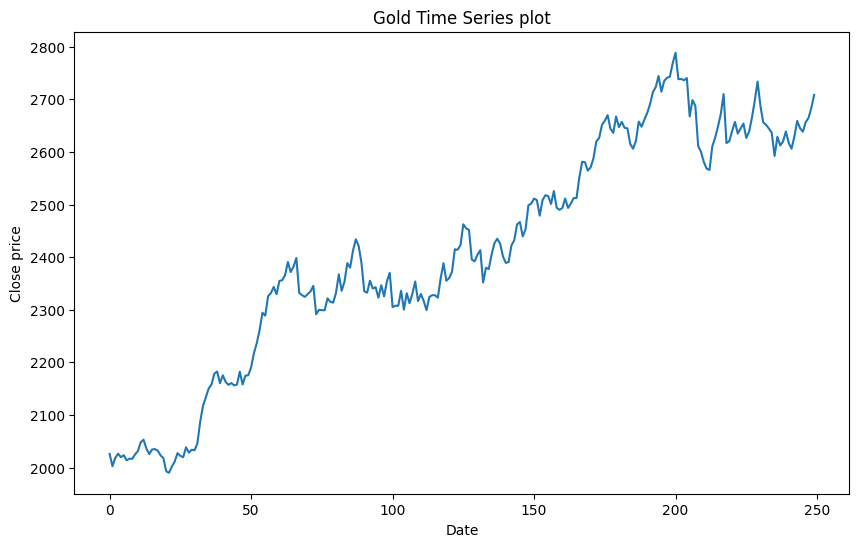

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(Series['Close'])
plt.title('Gold Time Series plot')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

## Decomposition

In [16]:
Series.columns

Index(['Date', 'Close'], dtype='object')

In [17]:
Series['Date'] = pd.to_datetime(Series['Date']).dt.date

In [18]:
Series.columns

Index(['Date', 'Close'], dtype='object')

In [19]:
Series.isna().sum()

,0
Date,0
Close,0


In [20]:
Series.duplicated(subset='Date').sum()

0

In [21]:
Series['Date']

,Date
0,2024-01-16
1,2024-01-17
2,2024-01-18
3,2024-01-19
4,2024-01-22
...,...
245,2025-01-06
246,2025-01-07
247,2025-01-08
248,2025-01-09


additive
-------------------------------------


<IPython.core.display.Math object>

-----------------------------------


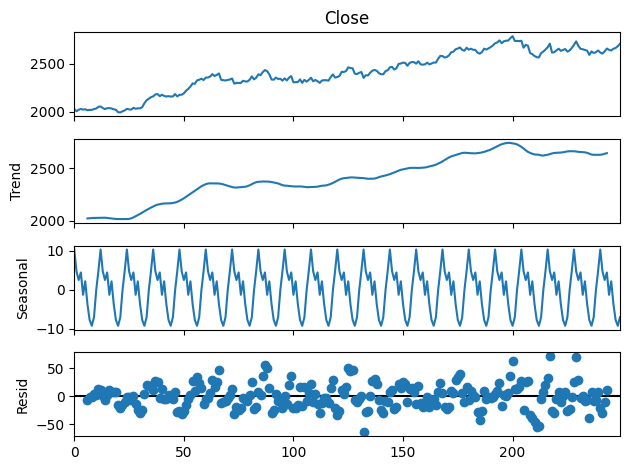

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, Math
print('additive')
print('-------------------------------------')
display(Math(r"Y(t) = T(t) + S(t) + R(t)"))
print('-----------------------------------')
decompose_result = seasonal_decompose(Series['Close'], model='additive', period=12)
decompose_result.plot()
plt.show()

## Stationary Test

In [23]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(Series['Close'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -1.21
p-value: 0.67
The series is non-stationary


##  Detrending

### Subtract Trend

In [24]:
from scipy.signal import detrend

Series['Detrended'] = detrend(Series['Close'])

res = adfuller(Series['Detrended'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -2.58
p-value: 0.1
The series is non-stationary


In [25]:
Series['Close_Diff'] = Series['Close'].diff()

In [26]:
Series['Close_Diff'].isna().sum()

1

In [27]:
Series.dropna(inplace=True)

In [28]:
Series['Close_Diff']

,Close_Diff
1,-23.400024
2,16.000000
3,7.900024
4,-6.699951
5,3.899902
...,...
245,-6.600098
246,18.300049
247,7.800049
248,19.300049


In [29]:
res = adfuller(Series['Close_Diff'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -16.73
p-value: 0.0
The series is stationary


## ARIMA Model

### Determinat p,q,d



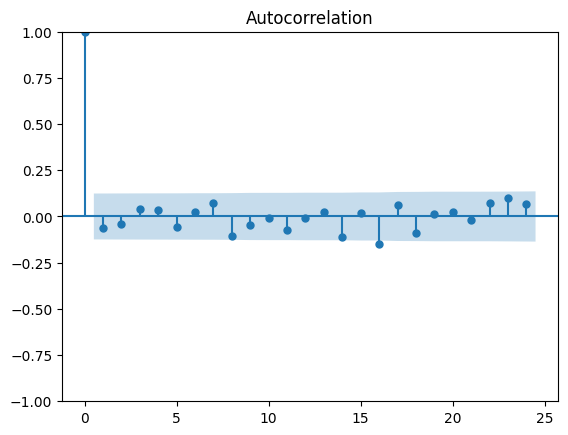

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(Series['Close_Diff'].dropna())
plt.show()

In [31]:
print('first bar in blue erea is 2, p = 2')

first bar in blue erea is 2, p = 2


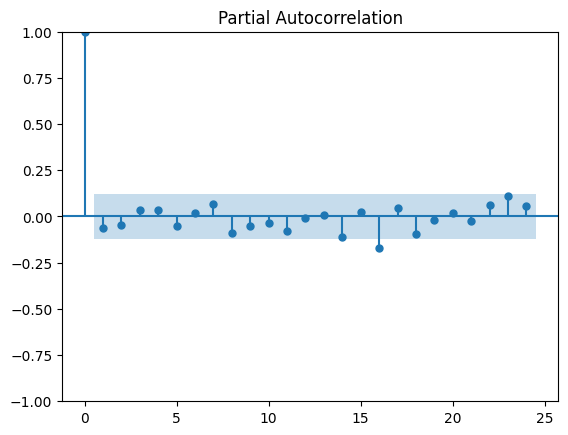

In [32]:
plot_pacf(Series['Close_Diff'].dropna())
plt.show()

In [33]:
print('first bar in blue erea is 2, q = 2')

first bar in blue erea is 2, q = 2


In [44]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(Series['Close_Diff'], order=(2, 1, 2))
model_fit = model.fit()

In [45]:
model_fit.forecast(steps=10)

,predicted_mean
249,1.069508
250,2.766711
251,2.833995
252,2.639619
253,2.829334
254,2.653796
255,2.815478
256,2.666618
257,2.803668
258,2.677492


In [36]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close_Diff   No. Observations:                  249
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1133.219
Date:                Mon, 13 Jan 2025   AIC                           2276.439
Time:                        16:20:58   BIC                           2294.006
Sample:                             0   HQIC                          2283.511
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0019      0.137     -7.318      0.000      -1.270      -0.734
ar.L2         -0.0748      0.071     -1.058      0.290      -0.213       0.064
ma.L1         -0.0554      0.259     -0.214      0.8

## Auto Arima

In [47]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(
    Series['Close_Diff'],
    start_p=1,
    start_q=1,
    max_p=5,
    max_q=5,
    d=1,
    seasonal=False,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

In [48]:
stepwise_fit

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [49]:
print(stepwise_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  249
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1149.486
Date:                Mon, 13 Jan 2025   AIC                           2310.972
Time:                        16:35:28   BIC                           2332.053
Sample:                             0   HQIC                          2319.459
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8884      0.071    -12.467      0.000      -1.028      -0.749
ar.L2         -0.7542      0.085     -8.875      0.000      -0.921      -0.588
ar.L3         -0.5305      0.096     -5.522      0.0

In [50]:
n_periods=10
forcast, conf_int = stepwise_fit.predict(
    n_periods=n_periods,
    return_conf_int=True
)

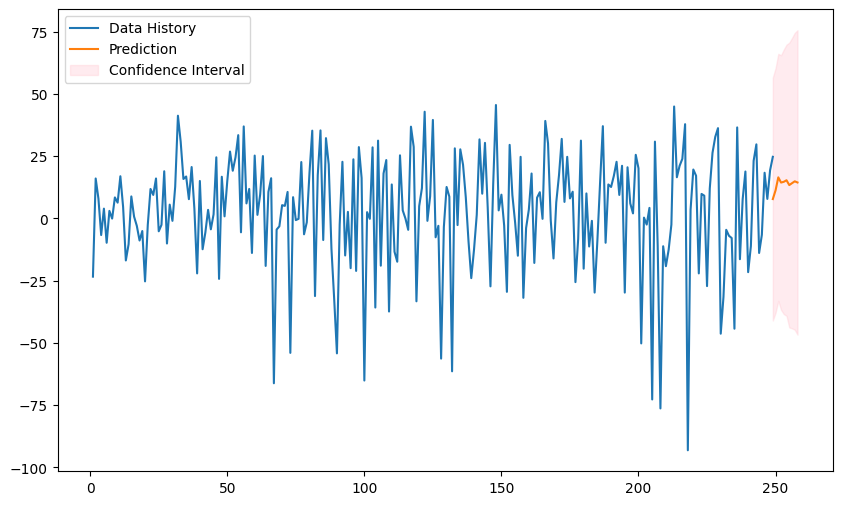

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(Series['Close_Diff'].index, Series['Close_Diff'], label='Data History')
plt.plot(range(len(Series['Close_Diff']), len(Series['Close_Diff']) + n_periods), forcast, label="Prediction")
plt.fill_between(
   range(len(Series['Close_Diff']), len(Series['Close_Diff']) + n_periods),
   conf_int[:, 0],
   conf_int[:, 1],
   color='pink',
   alpha=0.3,
   label='Confidence Interval'
)
plt.legend()


In [52]:
forcast

,0
249,7.742059
250,11.238909
251,16.458991
252,14.368000
253,14.669337
254,15.288921
255,13.355099
256,14.119424
257,14.866729
258,14.404610


## Forecat Orginal Scale

In [56]:
forcast_orginal_scale = [Series['Close'].iloc[-1]]

for scale in forcast:
  forcast_orginal_scale.append(forcast_orginal_scale[-1] + scale)

forcast_orginal_scale = forcast_orginal_scale[1:]

In [58]:
pd.Series(forcast_orginal_scale, name="Close_price_forcasting")

,Close_price_forcasting
0,2716.242059
1,2727.480969
2,2743.939959
3,2758.307959
4,2772.977296
5,2788.266217
6,2801.621317
7,2815.740740
8,2830.607470
9,2845.012080


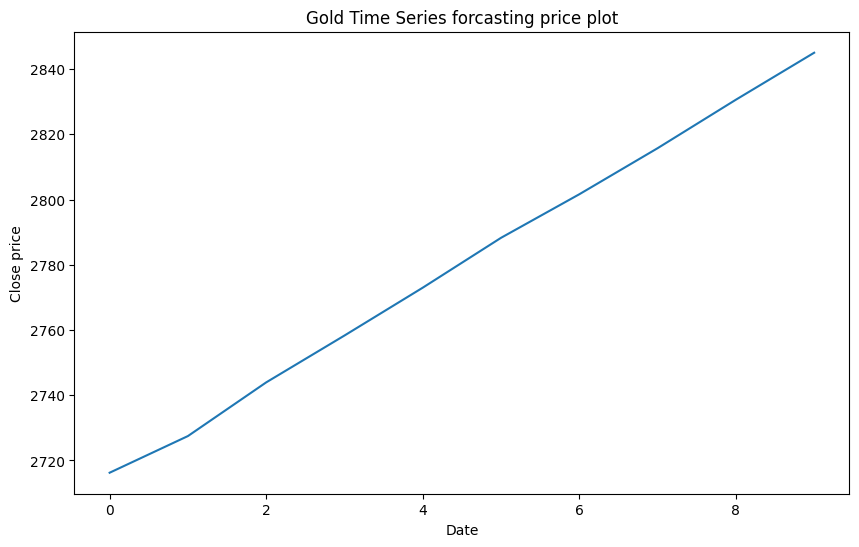

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(forcast_orginal_scale)
plt.title('Gold Time Series forcasting price plot')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()